In [1]:
import pandas as pd

subway = pd.read_csv('station_weekly.csv')

In [2]:
subway.head()

,STATION,LINENAME,datetime,Hourly_Entries,Hourly_Exits
0,1 AV,L,2018-03-31 04:00:00,1359.0,937.0
1,1 AV,L,2018-03-31 08:00:00,471.0,928.0
2,1 AV,L,2018-03-31 12:00:00,2509.0,2810.0
3,1 AV,L,2018-03-31 16:00:00,4115.0,4228.0
4,1 AV,L,2018-03-31 20:00:00,4491.0,5512.0


In [3]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27738 entries, 0 to 27737
Data columns (total 5 columns):
STATION           27738 non-null object
LINENAME          27738 non-null object
datetime          27738 non-null object
Hourly_Entries    27738 non-null float64
Hourly_Exits      27738 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


In [26]:
a = subway[subway.STATION == '1 AV']

In [7]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 5 columns):
STATION           41 non-null object
LINENAME          41 non-null object
datetime          41 non-null object
Hourly_Entries    41 non-null float64
Hourly_Exits      41 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.9+ KB


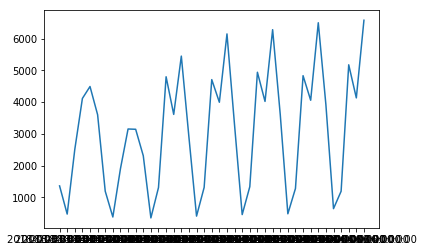

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(a.datetime, a.Hourly_Entries);

In [27]:
a['dt'] = pd.to_datetime(a['datetime'])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 6 columns):
STATION           41 non-null object
LINENAME          41 non-null object
datetime          41 non-null object
Hourly_Entries    41 non-null float64
Hourly_Exits      41 non-null float64
dt                41 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 2.2+ KB


In [34]:
a.head()

,STATION,LINENAME,datetime,Hourly_Entries,Hourly_Exits,dt
0,1 AV,L,2018-03-31 04:00:00,1359.0,937.0,2018-03-31 04:00:00
1,1 AV,L,2018-03-31 08:00:00,471.0,928.0,2018-03-31 08:00:00
2,1 AV,L,2018-03-31 12:00:00,2509.0,2810.0,2018-03-31 12:00:00
3,1 AV,L,2018-03-31 16:00:00,4115.0,4228.0,2018-03-31 16:00:00
4,1 AV,L,2018-03-31 20:00:00,4491.0,5512.0,2018-03-31 20:00:00


In [63]:
a.dt[0].weekday()

5

In [42]:
a['weekday'] = a['dt'].apply(lambda x: x.weekday())

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
a_day = a.groupby(['STATION','LINENAME','weekday'])[['Hourly_Entries','Hourly_Exits']].sum()

In [58]:
a_day

Hourly_Entries  Hourly_Exits
STATION LINENAME weekday                              
1 AV    L        0               17825.0       19505.0
                 1               19463.0       22025.0
                 2               20295.0       21976.0
                 3               20759.0       22838.0
                 4               21637.0       23235.0
                 5               12945.0       14415.0
                 6               13367.0       14932.0

In [59]:
a_day['daily_traiffic'] = a_day.Hourly_Entries +a_day.Hourly_Exits

In [70]:
a_day = a_day.reset_index()

In [64]:
def workday_index(df):
    for row in df
    weekend = 0
    weekday = 0
    if row['weekday'] < 5:
        weekday += row['daily_traffic']
    else:
        weekend += row['daily_traffic']
        
    index = weekday/weekend * 2/5
    return index



In [88]:
a_day.columns = ['STATION', 'LINENAME', 'weekday', 'Hourly_Entries', 'Hourly_Exits',
       'daily_traffic', 'is_weekday']

In [83]:
def is_weekday(row):
    if row < 5:
        return 1
    else: 
        return 0

In [84]:
a_day['is_weekday'] = a_day['weekday'].apply(is_weekday)

In [94]:
a_day.groupby(['is_weekday'])['daily_traffic'].mean()

27829.5

In [115]:
subway['dt'] = pd.to_datetime(subway['datetime'])
subway['weekday'] = subway['dt'].apply(lambda x: x.weekday())
daily_subway = subway.groupby(['STATION','LINENAME','weekday'])[['Hourly_Entries','Hourly_Exits']].sum()

daily_subway['daily_traffic'] = daily_subway.Hourly_Entries + daily_subway.Hourly_Exits
daily_subway = daily_subway.reset_index()
daily_subway['is_weekday'] = daily_subway['weekday'].apply(is_weekday)

In [106]:
daily_subway.head()

,STATION,LINENAME,weekday,Hourly_Entries,Hourly_Exits,daily_traiffic,is_weekday
0,1 AV,L,0,17825.0,19505.0,37330.0,1
1,1 AV,L,1,19463.0,22025.0,41488.0,1
2,1 AV,L,2,20295.0,21976.0,42271.0,1
3,1 AV,L,3,20759.0,22838.0,43597.0,1
4,1 AV,L,4,21637.0,23235.0,44872.0,1


In [117]:
daily_subway['stl'] = daily_subway['STATION'] + ' ' + daily_subway['LINENAME']

In [110]:
daily_subway.head()

,STATION,LINENAME,weekday,Hourly_Entries,Hourly_Exits,daily_traiffic,is_weekday,stl
0,1 AV,L,0,17825.0,19505.0,37330.0,1,1 AV L
1,1 AV,L,1,19463.0,22025.0,41488.0,1,1 AV L
2,1 AV,L,2,20295.0,21976.0,42271.0,1,1 AV L
3,1 AV,L,3,20759.0,22838.0,43597.0,1,1 AV L
4,1 AV,L,4,21637.0,23235.0,44872.0,1,1 AV L


In [129]:
ds2 = daily_subway.groupby(['stl','is_weekday'])[['daily_traffic']].sum().reset_index()

In [132]:
ds2.head()

,stl,is_weekday,daily_traffic,idx
0,1 AV L,0,55659.0,NaN
1,1 AV L,1,209558.0,3.765034
2,103 ST 1,0,22372.0,0.106758
3,103 ST 1,1,90564.0,4.048096
4,103 ST 6,0,18203.0,0.200996


In [133]:
ds2['idx'] = ds2['daily_traffic']/ds2['daily_traffic'].shift(1)
ds2['weekly_traffic'] = ds2['daily_traffic'] + ds2['daily_traffic'].shift(1)

In [134]:
ds3 = ds2[ds2.is_weekday == 1]

In [141]:
ds3 = ds3[['stl','idx','weekly_traffic']].reset_index()

In [143]:
ds3= ds3[['stl','idx','weekly_traffic']]

In [145]:
ds3['scaled_weekday_index'] = ds3['idx']/2.5

In [146]:
ds3

,stl,idx,weekly_traffic,scaled_weekday_index
0,1 AV L,3.765034,265217.0,1.506013
1,103 ST 1,4.048096,112936.0,1.619238
2,103 ST 6,5.777674,123374.0,2.311070
3,103 ST BC,7.822340,38386.0,3.128936
4,103 ST-CORONA 7,3.669575,199120.0,1.467830
5,104 ST A,5.598851,11482.0,2.239540
6,104 ST JZ,5.003188,5649.0,2.001275
7,110 ST 6,5.366306,104261.0,2.146523
8,111 ST 7,3.634896,108540.0,1.453958
9,111 ST A,6.671571,17729.0,2.668628


In [147]:
ds3.to_csv('station_list.csv')